In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
# Load and process
metric_with_ann = pd.read_csv("../extra/celltype_ann/with_ann_metric.csv", index_col=0)
metric_no_ann = pd.read_csv("../extra/celltype_ann/adamson.csv", index_col=0)
metric_no_ann['Method'] = metric_no_ann['Method'].replace({'Gears': 'GEARS', 'scOracle': 'Scouter'})

metric_cols = ["NormMSE", "Pearson"]
metric_with_ann = metric_with_ann[metric_cols].assign(With_Ann='Yes')
metric_no_ann = metric_no_ann[metric_no_ann.Method == "Scouter"][metric_cols].assign(With_Ann='No')
metric_df = pd.concat([metric_with_ann, metric_no_ann])

metric_long = metric_df.melt(id_vars='With_Ann', var_name='Metric', value_name='Value')
metric_long['Metric'] = metric_long['Metric'].replace({
    'NormMSE': 'Normalized MSE',
    'Pearson': 'PCC'
})

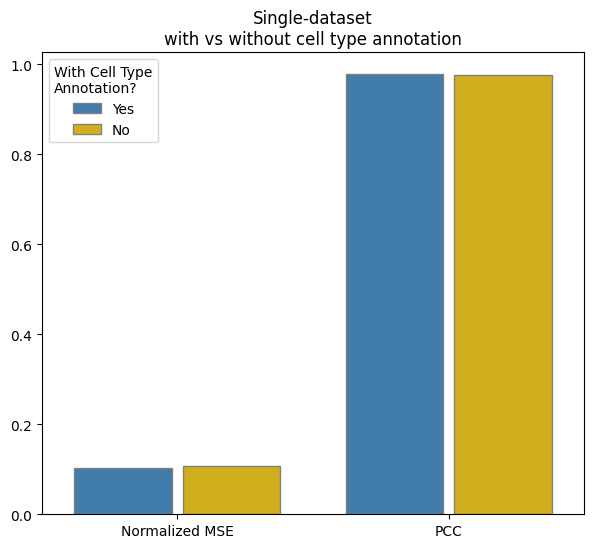

In [3]:
palette = {'Yes': '#2f7ebc', 'No': '#efc000'}
fig, ax1 = plt.subplots(1, 1, figsize=(7, 6))
sns.barplot(
    data=metric_long,
    x='Metric', y='Value', hue='With_Ann',
    palette=palette, ax=ax1,
    estimator='median', errorbar=None,
    edgecolor='gray', gap=0.1
)
ax1.set_title('')
ax1.set_ylabel('')
ax1.set_xlabel('')
ax1.set_title('Single-dataset\nwith vs without cell type annotation')
ax1.legend(title='With Cell Type\nAnnotation?')
plt.show()
